# 統計解析 (3)　課題 解答例

---
## Exercise 1.1
__下に示すデータはある野菜100個体の収穫量・20箇所の遺伝子の場所に位置する塩基のデータである。<br>__
__このデータを読み込み、遺伝子情報から収穫量を予測するモデル式を作りたい。<br>__

__まずは、作ったモデル式が予測に有効かどうか確認出来るように、データをモデルを作る為のTraining Setと予測能力の確認用のTest Setに分けよう。__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv("https://github.com/CropEvol/lecture/blob/master/textbook_2018/11_statistics/data/data.csv?raw=true", index_col=0)
data.head()

#--- 以下にプログラムを追記してください ---
convert_data = pd.get_dummies(data, drop_first=True)

X = convert_data.iloc[:, 1:]
Y = convert_data.loc[:, "CropYield"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.1)


---
## Exercise 1.2
__次に、sklearnライブラリを用いて、Training Dataから重回帰分析を用いてモデルを作ってみよう。<br>__
__また、作ったモデルにおける、Training Dataでの決定係数、Test Dataでの決定係数を求めよう。__

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


[ 3.51993859  2.50394546  2.64018934  4.17552637  4.82642728  0.19717019
  2.71733122 -5.42645522  1.92139781 -1.92764155 -2.36554464 -9.93507649
 -0.04988228  1.20399484 -0.16739189  1.40381108 -0.52822628 -1.09978582
 -2.58861406 -9.41191304 -0.88440592  2.80100457  0.5746979   0.38046117
  0.86144938 -1.05616142  0.97970969 -0.0291484  -1.21813387  1.70147026
 -7.1993674   0.41149677  0.74627855 -9.33599114 -6.58895287 -5.54755654
  7.92687868  1.2630861  10.82231893 -0.31551937 -0.22853039  1.57834433
 -3.21699521 -1.30941852  0.60506602  0.11263159 -2.31974519 -0.23447547
  0.20275051 13.00336787  8.02959098 -1.6524732  -1.4363899  -1.61842101
 -0.24392035 -1.01882387 -2.96263873  0.70402972  2.26944004  0.01302411]
0.9717501723253444
0.5617754497856493


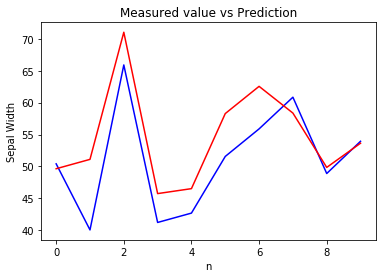

In [2]:
from sklearn import linear_model

# モデル選択
clf = linear_model.LinearRegression()

# Training Dataから予測モデルを作成
clf.fit(X_train, y_train)

# 偏回帰係数
print(clf.coef_)

# Training Dataの決定係数
print(clf.score(X_train, y_train))

# Test Dataでの決定係数
print(clf.score(X_test, y_test))



###### (参考)Test Dataにおける実測値と予測値の比較

predict_value = clf.predict(X_test)

plt.plot(range(len(y_test)), y_test, color="b")
plt.plot(range(len(y_test)), predict_value, color="r")

plt.title("Measured value vs Prediction")
plt.xlabel("n")
plt.ylabel("Sepal Width")
plt.show()

---
## Exercise 1.3
__重回帰分析よりも、より予測精度の優れたモデルを作りたい。<br>__
__重回帰分析以外の手法を用いてモデルを作ってみよう。(講義で扱っていない手法でも可)<br>__
__その際、Test Dataでの決定係数を大きくすることを目標に。__

[ 1.0941702   0.62577712  0.85431408  4.12591567  5.2438062  -0.62975445
  2.1905517  -6.31943396  0.12637248 -0.54872886 -1.84772879 -8.85345385
 -0.          1.02743749 -0.          0.47027506  0.16742295 -0.50769095
 -3.41174856 -7.90451998 -0.92462941  1.16957523  0.16647964 -0.
  0.         -0.08192689 -0.         -0.         -1.00307655  0.
 -6.56925493  1.47762312 -0.         -8.32581813 -3.40540603 -3.85809354
  5.79330572 -0.          8.88361806 -0.         -0.22899661  0.52371151
 -2.12121269 -0.81720755  0.         -0.         -0.14016967  0.
 -0.         10.25341953  6.05695274 -0.32752252 -0.24918213  0.
  0.27289374 -0.         -0.29719448 -0.          0.         -0.11956399]
0.9465534162578301
0.8651857901316551


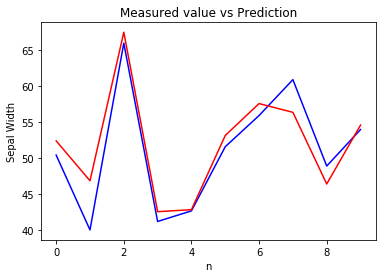

In [3]:
from sklearn import linear_model

# モデル選択
clf = linear_model.Lasso(alpha=0.07)

# Training Dataから予測モデルを作成
clf.fit(X_train, y_train)

# 偏回帰係数
print(clf.coef_)

# Training Dataの決定係数
print(clf.score(X_train, y_train))

# Test Dataでの決定係数
print(clf.score(X_test, y_test))



# (参考)
# Test Dataにおける実測値と予測値の比較
predict_value = clf.predict(X_test)

plt.plot(range(len(y_test)), y_test, color="b")
plt.plot(range(len(y_test)), predict_value, color="r")

plt.title("Measured value vs Prediction")
plt.xlabel("n")
plt.ylabel("Sepal Width")
plt.show()

---

## 質問・要望
質問や要望があれば、メール本文か下のセルに書いてください。


## 課題の提出について

今回の課題番号：`11`

提出方法：
1. 課題終了後のノートブックファイルをダウンロードする
1. そのファイルをメールに添付して、下記アドレスに送信する  

    __＊重要＊　  
    メールの件名を `HW[課題番号2桁]+SID[学籍番号(4桁-2桁-４桁)]`（すべて半角英数） にしてください。__  
    
    例） HW11+SID1234-56-7890
    

提出先: cropevol@gmail.com

提出期限: 2019年1月07日（月） 17:00まで

